In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import scipy.optimize as op
import sys

In [3]:
'''
PLOTDATA Plots the data points X and y into a new figure 
   PLOTDATA(x,y) plots the data points with + for the positive examples
   and o for the negative examples. X is assumed to be a Mx2 matrix.
'''
def plotData(X, y, hold=False):
	pos_vals = np.where(y==1)
	neg_vals = np.where(y==0)
	pass_rows = X[pos_vals, : ][0]
	fail_rows = X[neg_vals, : ][0]

	# Plot the linear fit
	plt.scatter(pass_rows[:,1], pass_rows[:,2], marker='+',  color='k', label='pass', s = 100) 
	plt.scatter(fail_rows[:,1], fail_rows[:,2], marker='o',  color='y', label='fail', s = 100) 
	plt.legend(loc='lower right')
	plt.xlabel('Category 1 Scores')
	plt.ylabel('Category 2 Scores')
	plt.title('Scatter Plot of Pass/Fail Results based on Category Scores')
	if(hold==False):
		plt.show()

In [4]:
'''
SIGMOID computes sigmoid of a number
'''
def sigmoid(x):
  return 1 / (1 + np.exp(-x))


In [5]:
'''
ComputeCost computes the cost function
'''
def computeCost(theta, X, y):
    #computeCost Compute cost for logistic regression
    #   J = computeCost(X, y, theta) computes the cost of using theta as the
    #	parameter for logistic regression and the gradient of the cost
    #	w.r.t. to the parameters.

    # Initialize some useful values
    m = len(y); # number of training examples
    # You need to return the following variables correctly 
    J = 0;

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta
    # =========================================================================
    # You should set J to the cost.
    y = y.reshape(m,1)
    z = np.matmul(X,theta) 		# X*theta
    h_theta = sigmoid(z)				# sigmoid
    cost_0 = np.log(1-h_theta)			# Cost For Fail(=0) Term
    cost_1 = np.log(h_theta)			# Cost For Pass(=1) Term
    J = (1.0/float(m))*((-1*np.matmul(np.transpose(y),cost_1))-np.matmul(np.transpose(1-y),cost_0))
    cost = J[0]
    return cost

In [6]:
'''
ComputeGrad computes the Gradient
'''
def computeGrad(theta, X, y):
    #computeGrad Computes gradient for logistic regression
    
    # Initialize some useful values
    (m, n) = X.shape # number of training examples
    
    # You need to return the following variables correctly 
    grad = 0;

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the gradient of cost for a particular choice of theta
    # =========================================================================
    # You should set grad to the gradient.
    y 			= y.reshape((m,1))
    theta		= theta.reshape((n,1))
    z		 	= np.matmul(X,theta) 		# X*theta
    h_theta	  	= sigmoid(z)				# sigmoid
    grad		= (1.0/float(m))*np.matmul(np.transpose(X),np.subtract(h_theta,y))	
    #print X.shape, theta.shape, y.shape, np.subtract(h_theta,y).shape
    return grad

In [7]:
'''
#PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
#the decision boundary defined by theta
#   PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
#   positive examples and o for the negative examples. X is assumed to be 
#   a either 
#   1) Mx3 matrix, where the first column is an all-ones column for the 
#      intercept.
#   2) MxN, N>3 matrix, where the first column is all-ones
'''
def plotDecisionBoundary(theta, X, y):
	plotData(X,y,True)
	(m,n) = X.shape
	if(n<=3):
		# Only need 2 points to define a line, so choose two endpoints
		x_min  = int(np.min(X[:,1])-2)
		x_max  = int(np.max(X[:,1])+2)
		plot_x = np.array(range(x_min,x_max))

		# Calculate the decision boundary line
		plot_y = (-1.0/theta[2])*((theta[1]*plot_x) + theta[0])
		#print plot_y
		
		# Plot, and adjust axes for better viewing
		plt.plot(plot_x, plot_y)
		plt.show()
	else:
		#print "In Else"
		# Here is the grid range
		u = np.linspace(-1, 1.5, 50);
		v = np.linspace(-1, 1.5, 50);

		z = np.zeros((len(u), len(v)));
		# Evaluate z = theta*x over the grid
		for i in range(len(u)):
			for j in range(len(v)):
				z_mul  = np.matmul(mapFeature(np.array([u[i]]), np.array([v[j]])),theta)
				z[i,j] = z_mul[0]
		z = np.transpose(z); # important to transpose z before calling contour

		# Plot z = 0
		# Notice you need to specify the range [0, 0]
		plt.contour(u, v, z)
		plt.show()

In [8]:
'''
PREDICT Predict whether the label is 0 or 1 using learned logistic 
regression parameters theta
   p = PREDICT(theta, X) computes the predictions for X using a 
   threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
'''		
def predict(theta, X):

	m = len(X) # Number of training examples
	p = np.zeros((m,1))
	# ====================== YOUR CODE HERE ======================
	# Instructions: Complete the following code to make predictions using
	#               your learned logistic regression parameters. 
	#               You should set p to a vector of 0's and 1's
	#
	answer = sigmoid(np.matmul(X,theta))
	# You need to return the following variables correctly
	p=0
	p = [int(round(x)) for x in answer]
	return np.array(p)
	return p

In [9]:
'''
MAPFEATURE Feature mapping function to polynomial features
	MAPFEATURE(X1, X2) maps the two input features
	to quadratic features used in the regularization exercise.
	Returns a new feature array with more features, comprising of 
	X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
	Inputs X1, X2 must be the same size
'''
def mapFeature(X1, X2):
	degree 		= 6	
	# ====================== YOUR CODE HERE ======================
	# Instructions: Complete the following code to map X Array
	#               to a higher order feature vector 
	#               You should return the higher order feature vector as out
	#
	num_terms 	= (degree+1) * (degree + 2) /2 	#No. Of Terms => 7*8/2 = 28
	lenX		=  X1.shape	
	#print X1, X2,lenX, num_terms
	out = np.ones((lenX[0], num_terms))
	col=0
	for i in range(degree+1):
		for j in range(i+1):
			out[:,col] = np.multiply(np.power(X1,(i-j)), np.power(X2,j))
			col=col+1
	return out

In [10]:
'''
computeCostReg Compute cost and gradient for logistic regression with regularization
   J = COMPUTECOSTREG(theta, X, y, lambda_reg) computes the cost of using
   theta as the parameter for regularized logistic regression and the
   gradient of the cost w.r.t. to the parameters. 
'''
def computeCostReg(theta, X, y, lambda_reg):
	# Initialize some useful values
	(m,n) = X.shape # number of training examples

	# You need to return the following variables correctly 
	J = 0;
	
	# ====================== YOUR CODE HERE ======================
	# Instructions: Compute the cost of a particular choice of theta
	# =========================================================================
	# You should set J to the cost.
	y = y.reshape(m,1)
	z		 	= np.matmul(X,theta) 		# X*theta
	h_theta	  	= sigmoid(z)				# sigmoid
	cost_0		= np.log(1-h_theta)			# Cost For Fail(=0) Term
	cost_1		= np.log(h_theta)			# Cost For Pass(=1) Term
	J			= (np.add((1.0/float(m))*((-1*np.matmul(np.transpose(y),cost_1))-np.matmul(np.transpose(1-y),cost_0)),
					(lambda_reg/(2*float(m)))* np.sum(theta[1:n+1])))
	return J[0]

In [11]:
'''
ComputeGradReg computes the Regularized Gradient
'''
def computeGradReg(theta, X, y, lambda_reg):
    #computeGrad Computes gradient for logistic regression
	# Initialize some useful values
	(m, n) = X.shape # number of training examples
	
	# You need to return the following variables correctly 
	J = 0;

	# ====================== YOUR CODE HERE ======================
	# Instructions: Compute the cost of a particular choice of theta
	# =========================================================================
	# You should set J to the cost.
	y 				= y.reshape((m,1))
	theta			= theta.reshape((n,1))
	z		 		= np.matmul(X,theta) 		# X*theta
	h_theta	  		= sigmoid(z)				# sigmoid
	theta_new 		= np.copy(theta)
	theta_new[0]	= 0
	grad			= np.add((1.0/float(m))*np.matmul(np.transpose(X),np.subtract(h_theta,y)),(lambda_reg/float(m))*theta_new)
	#print X.shape, theta.shape, y.shape, np.subtract(h_theta,y).shape
	return grad


   Exam_1_Score  Exam_2_Score  Label
0     34.623660     78.024693      0
1     30.286711     43.894998      0
2     35.847409     72.902198      0
3     60.182599     86.308552      1
4     79.032736     75.344376      1


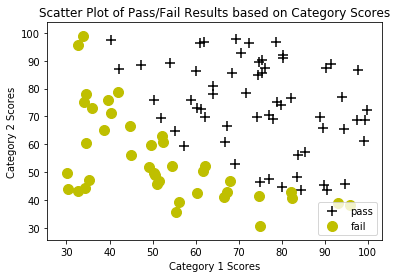

[[ 0.5  0.5]
 [ 0.5  0.5]]
Cost is: [ 0.69314718]
Gradient Matrix: [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
Optimal Theta:  [-25.16131869   0.20623159   0.20147149]
Optimal Cost:  0.203497701589


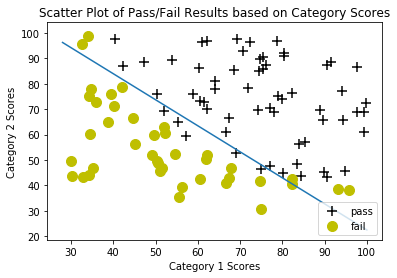

For a student with scores 45 and 85, we predict an admission probability of 0.77629062427
Train Accuracy:  89


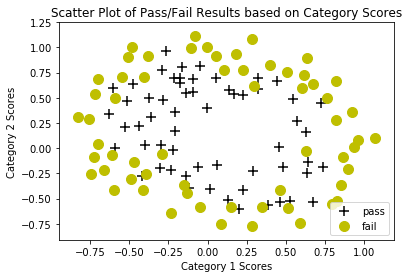

TypeError: 'float' object cannot be interpreted as an integer

In [12]:
## Load Data
#  The first two columns contains the exam scores and the third column
#  contains the label.
data 	= pd.read_csv('ex2data1.txt', header =  None, names = ['Exam_1_Score', 'Exam_2_Score', 'Label'])
print (data.head())
#Get The Labels
y_data 	= data.iloc[:,2]

#Get the Data
X_data 	= data.iloc[:,0:2]
(m, n) 	= X_data.shape

y 		= np.array(y_data)
#  Setup the data matrix appropriately, and add ones for the intercept term
X 		= np.c_[np.ones(m), np.array(X_data)] # Add a column of ones to x

#Call The Plotting Function
plotData(X, y)
#sys.exit()
#plt.savefig('OrigData1.png')
	
#Call The Sigmoid Function
print (sigmoid(np.zeros((2,2))))
#sys.exit()

# Initialize fitting parameters
initial_theta = np.zeros((n + 1, 1))

# Compute and display initial cost and gradient
cost= computeCost(initial_theta, X, y)
grad= computeGrad(initial_theta, X, y)
print ('Cost is:', cost )
print ('Gradient Matrix:', grad)
#sys.exit()

#Optimizing Using Built in Scipy Functions
Result = op.minimize(fun = computeCost, x0 = initial_theta, args = (X, y),method = 'TNC',jac = computeGrad) #You can also use bfgs for optimization method
optimal_theta = Result.x
print ("Optimal Theta: ", Result.x)
print ("Optimal Cost: ", Result.fun)

#Plotting the Decision Boundary
plotDecisionBoundary(optimal_theta, X, y)
#plt.savefig('OrigData1_withDecisionBoundary.png')
#sys.exit()

## ============== Part 4: Predict and Accuracies ==============
#  After learning the parameters, you'll like to use it to predict the outcomes
#  on unseen data. In this part, you will use the logistic regression model
#  to predict the probability that a student with score 45 on exam 1 and 
#  score 85 on exam 2 will be admitted.
#
#  Furthermore, you will compute the training and test set accuracies of 
#  our model.
#
#  Your task is to complete the code in function predict()

#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 

prob = sigmoid(np.matmul(np.array([1, 45, 85]), optimal_theta))
print ('For a student with scores 45 and 85, we predict an admission probability of', prob)

# Compute accuracy on our training set
p = predict(optimal_theta, X)

print ('Train Accuracy: ', np.sum(p == y)) #Should be 89%
#sys.exit()

## ================= Regularization ===================== 
## Load Data
#  The first two columns contains the X values and the third column
#  contains the label (y).

data 	= pd.read_csv('ex2data2.txt', header =  None, names = ['MicroChip_Test1', 'MicroChip_Test2', 'Label'])

#Get The Labels
y_data 	= data.iloc[:,2]

#Get the Data
X_data 	= data.iloc[:,0:2]
(m, n) 	= X_data.shape
y 		= np.array(y_data)
#  Setup the data matrix appropriately, and add ones for the intercept term
X 		= np.c_[np.ones(m), np.array(X_data)] # Add a column of ones to x

plotData(X, y)
#plt.savefig('OrigData2.png')
#sys.exit()

# Add Polynomial Features
# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
X1 	= np.array(data.iloc[:,0])
X2 	= np.array(data.iloc[:,1])
X = mapFeature(X1, X2)
#sys.exit()

# Initialize fitting parameters
(m,n) = X.shape
initial_theta = np.zeros((n, 1))

# Set regularization parameter lambda to 1
reg_lambda = 1

# Compute and display initial cost and gradient
cost= computeCostReg(initial_theta, X, y, reg_lambda)
grad= computeGradReg(initial_theta, X, y, reg_lambda)
print ('Cost is:', cost )
print ('Gradient Matrix:', grad.shape)

#Optimizing Using Built in Scipy Functions
Result = op.minimize(fun = computeCostReg, x0 = initial_theta, args = (X, y, reg_lambda),method = 'TNC',jac = computeGradReg) #You can also use bfgs for optimization method
optimal_theta = Result.x
print ("Optimal Theta: ", Result.x)
print ("Optimal Cost: ", Result.fun)

#Plotting the Decision Boundary
plotDecisionBoundary(optimal_theta, X, y)
#plt.savefig('OrigData_withDB_Lpoint0001.png')